In [2]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
meetingpoint = 0.92


In [4]:

## ASTRA ##
ne = np.load(os.path.join('astra_ne.npy'))*1e19
ni = np.load(os.path.join('astra_ni.npy'))*1e19
rhot = np.load(os.path.join('astra_rhot.npy'))
idx = np.argmin(np.abs(rhot - meetingpoint))
rhot = rhot[:idx]
ne = ne[:idx]
ni = ni[:idx]
plt.plot(rhot, ne, label = 'ne')
plt.plot(rhot, ni, label = 'ni')

## UEDGE ## 
print(ni[-1]) 


1.81063824e+20


In [5]:
uedge_point = 0.96

[0.92022599 0.93368149 0.94433618 0.95301799 0.96017325 0.96620547
 0.97136022 0.97583781 0.97971049 0.98309949 0.98616315 0.98891149
 0.99136095 0.99357259 0.99555881 0.99742104 0.99917208 1.00077887
 1.00229297 1.00384282 1.00548907 1.00718886 1.00901198 1.01093043
 1.01293531 1.01510349 1.01741726 1.01998039 1.02281375 1.0257894
 1.02905768 1.03275603 1.03681386 1.04136312 1.04647315 1.05210525
 1.05848482 1.06576478 1.07397415 1.08345399 1.09436622 1.10723783
 1.12228803 1.14073764]
4
17


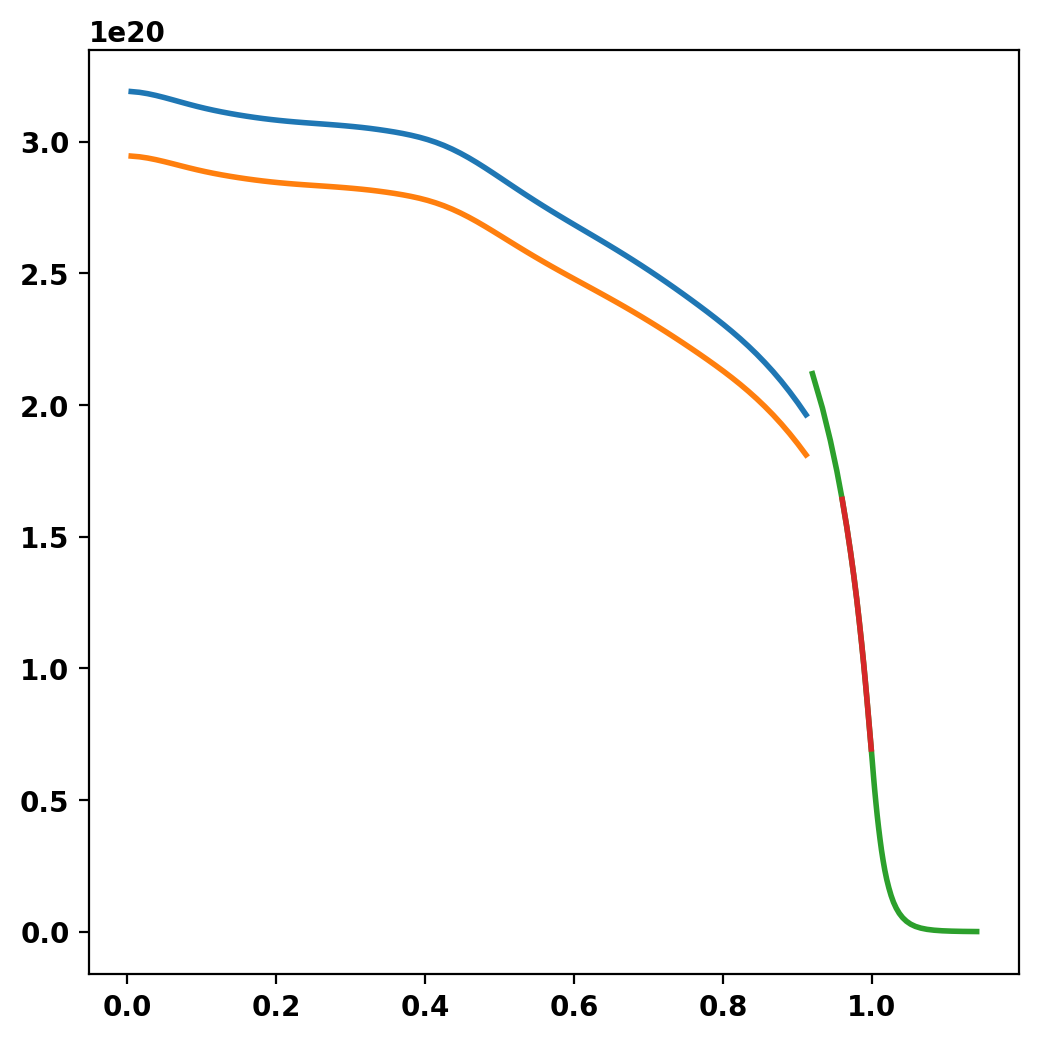

0.96017325
[0.96017325 0.96620547 0.97136022 0.97583781 0.97971049 0.98309949
 0.98616315 0.98891149 0.99136095 0.99357259 0.99555881 0.99742104
 0.99917208]


In [6]:
data = np.genfromtxt("uedge_ne.txt", delimiter=' ')
rho_uedge = 1 + (data[:, 0]/0.72) 
ne_uedge = data[:, 1]
print(rho_uedge) 
plt.plot(rho_uedge, ne_uedge) 
idx = np.argmin(np.abs(rho_uedge - 1))
ldx = np.argmin(np.abs(rho_uedge - uedge_point))
print(ldx) 
print(idx) 
ne_uedge = ne_uedge[ldx:idx]
rho_uedge = rho_uedge[ldx:idx]
plt.plot(rho_uedge, ne_uedge)
plt.show()
print(rho_uedge[0]) 
print(rho_uedge) 

In [7]:
cubic_scaling_ne = 0.5

In [8]:
######################
# Astra ne edge condition
x1 = rhot[-1]
y1 = ne[-1]
m1 = (ne[-1] - ne[-2])/(rhot[-1] - rhot[-2]) #slope of astra array

# UEDGE ne edge condition
x2 = rho_uedge[0]
y2 = ne_uedge[0]
m2 = (ne_uedge[1] - ne_uedge[0])/(rho_uedge[1] - rho_uedge[0]) #slope of uedge

from scipy.interpolate import CubicSpline
x = [x1, x2]
y = [y1, y2]
axis_bc = [1, m1]
edge_bc = [1, m2*cubic_scaling_ne]
print(x) 
print(y) # no way to make continuous so some cheesing here 
#plt.plot(x,y) 
cubic = CubicSpline(x,y,bc_type=[axis_bc,edge_bc])

cubic_x = np.linspace(x1, x2, 100)
cubic_y = cubic(cubic_x)
#plt.plot(cubic_x, cubic_y)

rho_full = np.concatenate([rhot, cubic_x, rho_uedge])
#print(rho_full) 
ne_full = np.concatenate([ne, cubic_y, ne_uedge])
plt.plot(rho_full, ne_full, label = 'ne')
#################### Ni #######################
# Astra Ni edge condition
x1 = rhot[-1]
y1 = ni[-1]
m1 = (ni[-1] - ni[-2])/(rhot[-1] - rhot[-2])

# UEDGE Ni edge condition
x2 = rho_uedge[0]
y2 = ne_uedge[0]
m2 = (ne_uedge[1] - ne_uedge[0])/(rho_uedge[1] - rho_uedge[0])

from scipy.interpolate import CubicSpline
x = [x1, x2]
y = [y1, y2]
axis_bc = [1, m1]
edge_bc = [1, m2*cubic_scaling_ne]
cubic = CubicSpline(x,y,bc_type=[axis_bc,edge_bc])

cubic_x = np.linspace(x1, x2, 100)
cubic_y = cubic(cubic_x)


rho_full = np.concatenate([rhot, cubic_x, rho_uedge])
ni_full = np.concatenate([ni, cubic_y, ne_uedge])
plt.plot(rho_full, ni_full, label = 'ni') 
plt.plot(cubic_x, cubic_y, 'r-' , label = 'cubic')

#path = '20241208_full_profiles/'
#np.save(os.path.join(path, "rho_full_density"), rho_full)
# np.save('ni_full', ni_full)
# np.save('ne_full', ne_full) 
plt.axvline(x1, color = 'k', linestyle = '--') 
plt.axvline(x2, color = 'k', linestyle = '--') 
print(x2) 
plt.title('Density over rho') 
plt.xlabel(r'$\rho$') 
plt.ylabel(r'n [$m^{-3}$]')
plt.legend()
plt.savefig('temp1.png') 
print(cubic_y[0]) 
# check the greenwald fraction 

[0.91160221, 0.96017325]
[1.96307297e+20, 1.641417e+20]
0.96017325
1.81063824e+20


In [9]:

## ASTRA ##
te = np.load(os.path.join('astra_te.npy'))*1E3
ti = np.load(os.path.join('astra_ti.npy'))*1E3
rhot = np.load(os.path.join('astra_rhot.npy'))
idx = np.argmin(np.abs(rhot - meetingpoint))
rhot = rhot[:idx]
te = te[:idx]
ti = ti[:idx]
plt.plot(rhot, te, label = 'te')
plt.plot(rhot, ti, label = 'ti')

## UEDGE ## 
print(ti[-1]) 


1858.15999


4
17


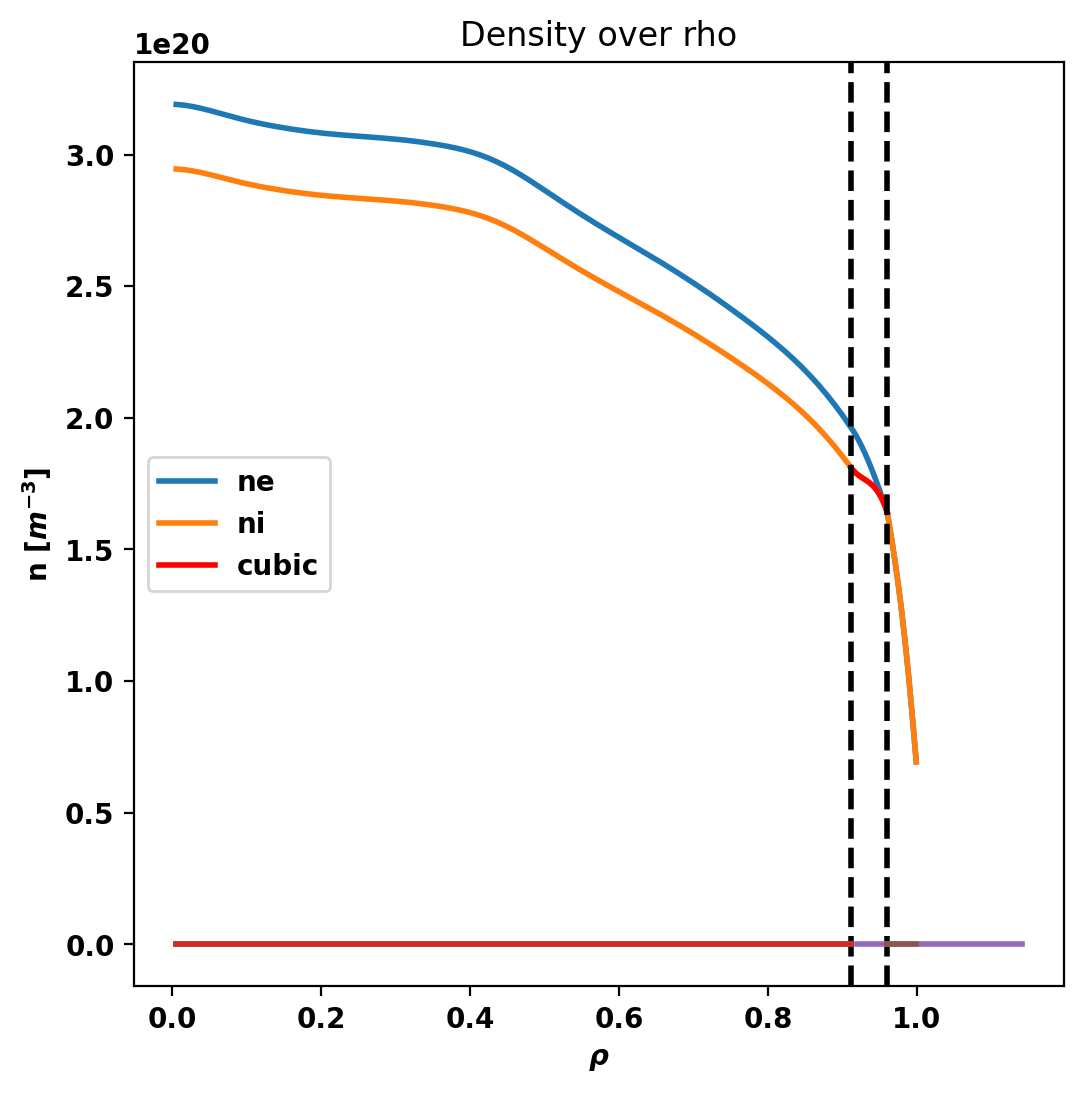

0.96017325
[431.2936 418.9174 406.0651 392.5147 378.0428 362.2558 344.7009 324.9242
 302.1278 275.4967 243.8288 205.2207 157.4179]


In [10]:
data = np.genfromtxt("uedge_te.txt", delimiter=' ')
rho_uedge = 1 + (data[:, 0]/0.72) 
te_uedge = data[:, 1]
idx = np.argmin(np.abs(rho_uedge - 1))
ldx = np.argmin(np.abs(rho_uedge - uedge_point))
print(ldx) 
print(idx) 
plt.plot(rho_uedge, te_uedge) 

te_uedge = te_uedge[ldx:idx]
rho_uedge = rho_uedge[ldx:idx]
plt.plot(rho_uedge, te_uedge) 

plt.show()
print(rho_uedge[0]) 
print(te_uedge) 

In [11]:
plt.plot(rho_uedge, te_uedge) 
print(te_uedge) 

[431.2936 418.9174 406.0651 392.5147 378.0428 362.2558 344.7009 324.9242
 302.1278 275.4967 243.8288 205.2207 157.4179]


In [12]:
cubic_scaling_te = 1

In [13]:

######################
# Astra ne edge condition
x1 = rhot[-1]
y1 = te[-1]
m1 = (te[-1] - te[-2])/(rhot[-1] - rhot[-2]) #slope of astra array

# UEDGE ne edge condition
x2 = rho_uedge[0]
y2 = te_uedge[0]
m2 = (te_uedge[1] - te_uedge[0])/(rho_uedge[1] - rho_uedge[0]) #slope of uedge

from scipy.interpolate import CubicSpline
x = [x1, x2]
y = [y1, y2]
axis_bc = [1, m1]
edge_bc = [1, m2*cubic_scaling_te]
#print(x) 
#print(y) # no way to make continuous so some cheesing here 
#plt.plot(x,y) 
cubic = CubicSpline(x,y,bc_type=[axis_bc,edge_bc])

cubic_x = np.linspace(x1, x2, 100)
cubic_y = cubic(cubic_x)
#plt.plot(cubic_x, cubic_y)

rho_full = np.concatenate([rhot, cubic_x, rho_uedge])
te_full = np.concatenate([te, cubic_y, te_uedge])

plt.plot(rhot, te, 'b') 
plt.plot(rho_uedge, te_uedge, 'r') 
plt.plot(rho_full, te_full, 'b', label = 'te')
plt.axvline(x1, color = 'k', linestyle = '--') 
plt.axvline(x2, color = 'k', linestyle = '--') 

#################### Ni #######################
# Astra Ni edge condition
x1 = rhot[-1]
print (x1)
y1 = ti[-1]
m1 = (ti[-1] - ti[-2])/(rhot[-1] - rhot[-2])

# UEDGE Ni edge condition
x2 = rho_uedge[0]
y2 = te_uedge[0]
m2 = (te_uedge[1] - te_uedge[0])/(rho_uedge[1] - rho_uedge[0])

from scipy.interpolate import CubicSpline
x = [x1, x2]
y = [y1, y2]
axis_bc = [1, m1]
edge_bc = [1, m2*cubic_scaling_te]

cubic = CubicSpline(x,y,bc_type=[axis_bc,edge_bc])

cubic_x = np.linspace(x1, x2, 100)
cubic_y = cubic(cubic_x)

rho_full = np.concatenate([rhot, cubic_x, rho_uedge])
ti_full = np.concatenate([ti, cubic_y, te_uedge])
plt.plot(rho_full, ti_full, 'g', label = 'ti') 
print(ti_full[0]) 
plt.plot(cubic_x, cubic_y, 'r', label = 'cubic')
plt.savefig('temp.png') 
#path = '20241208_full_profiles/'
#plt.xlim(0.8, 1) 
#plt.plot(rho_full, ti_full) 
plt.title('temperature') 
plt.xlabel(r'$\rho$') 
plt.ylabel('EV') 
plt.legend() 
print(x1) 


0.91160221
12106.7869
0.91160221


In [14]:
np.save('rho_full_v2', rho_full)
np.save('ti_full_v2', ti_full) 
np.save('te_full_v2', te_full) 
np.save('ne_full_v2', ne_full) 
np.save('ni_full_v2', ni_full) 
np.save('rho_full_temperature_v2', rho_full)
np.save('rho_full_density_v2', rho_full)


12106.7869
0.91160221
0.96017325


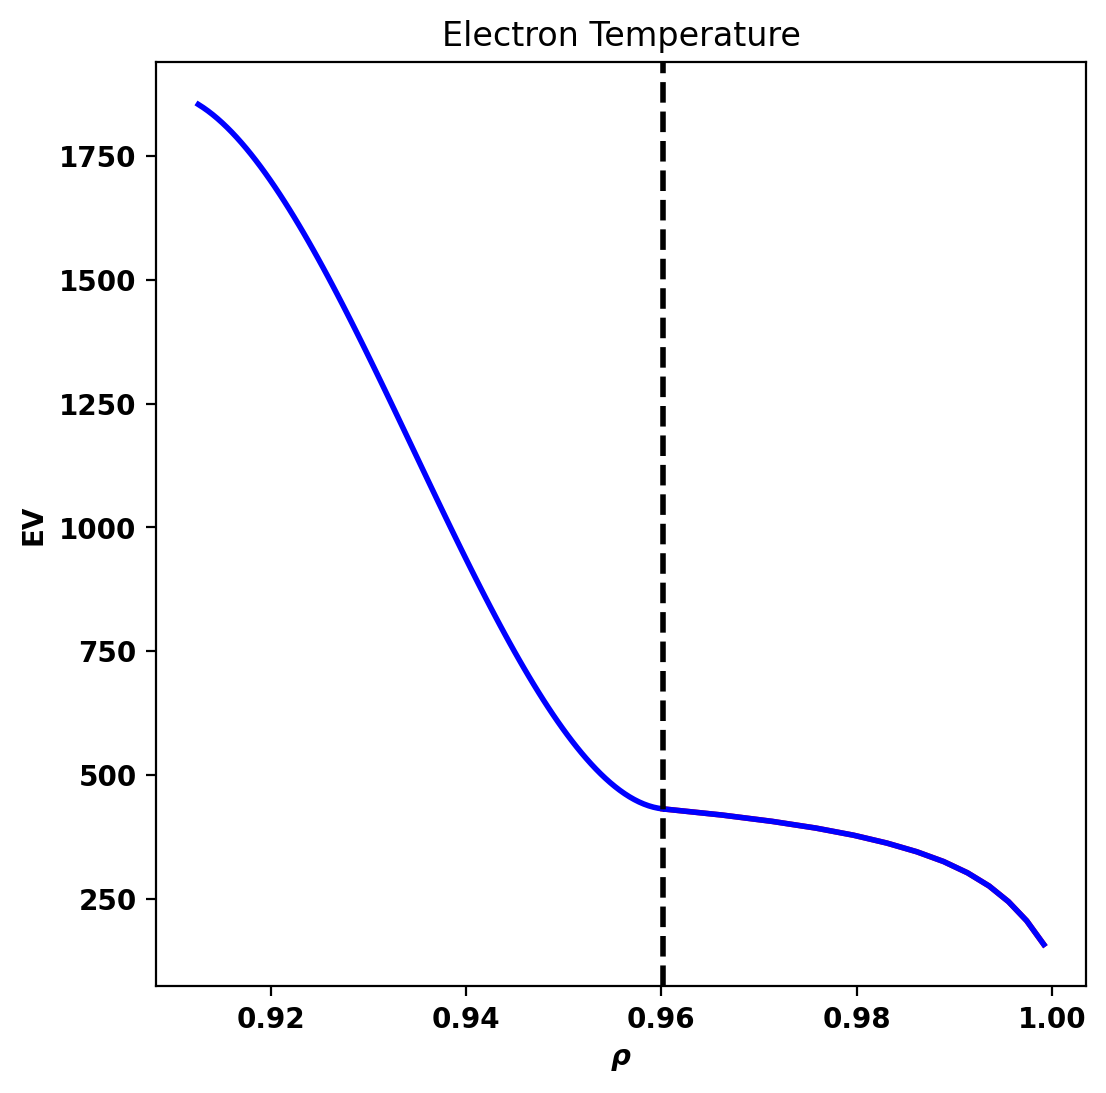

In [46]:

######################
# Astra ne edge condition
x1 = rhot[-1]
y1 = te[-1]
m1 = (te[-1] - te[-2])/(rhot[-1] - rhot[-2]) #slope of astra array

# UEDGE ne edge condition
x2 = rho_uedge[0]
y2 = te_uedge[0]
m2 = (te_uedge[1] - te_uedge[0])/(rho_uedge[1] - rho_uedge[0]) #slope of uedge

from scipy.interpolate import CubicSpline
x = [x1, x2]
y = [y1, y2]
axis_bc = [1, m1]
edge_bc = [1, m2*cubic_scaling_te]
#print(x) 
#print(y) # no way to make continuous so some cheesing here 
#plt.plot(x,y) 
cubic = CubicSpline(x,y,bc_type=[axis_bc,edge_bc])

cubic_x = np.linspace(x1, x2, 100)
cubic_y = cubic(cubic_x)
#plt.plot(cubic_x, cubic_y)

rho_full = np.concatenate([rhot, cubic_x, rho_uedge])
te_full = np.concatenate([te, cubic_y, te_uedge])

plt.plot(rhot[500:], te[500:], 'b') 
plt.plot(rho_uedge[:], te_uedge[:], 'r') 
plt.plot(rho_full[85:], te_full[85:], 'b', label = 'te')
#plt.axvline(x1, color = 'k', linestyle = '--') 
plt.axvline(x2, color = 'k', linestyle = '--') 

#################### Ni #######################
# Astra Ni edge condition
x1 = rhot[-1]
y1 = ti[-1]
m1 = (ti[-1] - ti[-2])/(rhot[-1] - rhot[-2])

# UEDGE Ni edge condition
x2 = rho_uedge[0]
y2 = te_uedge[0]
m2 = (te_uedge[1] - te_uedge[0])/(rho_uedge[1] - rho_uedge[0])

from scipy.interpolate import CubicSpline
x = [x1, x2]
y = [y1, y2]
axis_bc = [1, m1]
edge_bc = [1, m2*cubic_scaling_te]

cubic = CubicSpline(x,y,bc_type=[axis_bc,edge_bc])

cubic_x = np.linspace(x1, x2, 100)
cubic_y = cubic(cubic_x)

rho_full = np.concatenate([rhot, cubic_x, rho_uedge])
ti_full = np.concatenate([ti, cubic_y, te_uedge])
plt.plot(rho_full[500:], ti_full[500:], 'g', label = 'ti') 
print(ti_full[0]) 
plt.plot(cubic_x[500:], cubic_y[500:], 'r', label = 'cubic')
plt.savefig('temp.png') 
#path = '20241208_full_profiles/'
#plt.xlim(0.8, 1) 
#plt.plot(rho_full, ti_full) 
plt.title('Electron Temperature') 
plt.xlabel(r'$\rho$') 
plt.ylabel('EV') 
#plt.legend() 
print(x1) 
print(x2)
plt.show()


